# Visualización del archivo de coupling 

 Extraído de: "Relation Between Oceanic Plate Structure, Patterns of Interplate Locking and Microseismicity in the 1922 Atacama Seismic Gap" D. Gonzalez Vidal, et al. 2023

In [3]:
"""
Coupling figure - 2D Fault 
========================================================================
    Draw a GmtrFigure for the given lock model .
    """
import pygmt
import numpy as np
import geostochpy
import rockhound as rh
file_trench=geostochpy.get_data('trench-chile.txt')
trench = np.genfromtxt( file_trench, delimiter = " " )
lonfosa = trench[:,0]
latfosa = trench[:,1]
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
route_file=geostochpy.get_data('median_lock_Herrera2023.txt')
route_file_mesh=geostochpy.get_data('mesh__Herrera2023.npy')
mesh=np.load(route_file_mesh,allow_pickle=True)
median_lock=np.loadtxt(route_file)
mesh1=mesh[0]
mesh1[0,0]-mesh1[1,0]
#
grid=pygmt.xyz2grd(x=mesh1[:,0],y=mesh1[:,1],z=median_lock,region=region,spacing='0.1')
grid=pygmt.grdsample(grid=grid,region=region,spacing='0.005',outgrid='coupling.grd')
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
earth_grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
#
fig=pygmt.Figure()
fig.basemap(region=region,projection='M12c',frame=['WSne','y1+laatitude(°)','x2+laongitude(°)','g'])
fig.grdimage(grid=earth_grid,cmap='grayC',shading=True)
fig.colorbar(cmap=True,frame=["x+lElevation","y+lm"],)
cmap=pygmt.makecpt(cmap='hot',reverse=True,series=[0, 1, 0.1],continuous=False)
# fig.coast(shorelines=True, area_thresh=5000,land="gray")
# valparaiso 1730
fig.plot(x=[-77.6,-77.6],y=[-29,-36],fill='red',pen='2,red')
fig.text(x=-78,y=-32.5,text='Valparaíso 1730',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# valparaiso 1751
fig.plot(x=[-77,-77],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-77.3,y=-36,text='Concepción 1751',fill='white',font="10p,Helvetica-Bold,black",angle=90)

# valparaiso 1985,1906,1822
fig.plot(x=[-76,-76],y=[-32.5,-34.5],fill='red',pen='2,red')
fig.text(x=-76.5,y=-33.5,text='Valparaiso 1822,1906,1985',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Illapel 2015,1943,1880
fig.plot(x=[-75,-75],y=[-30,-31.6],fill='red',pen='2,red')
fig.text(x=-75.5,y=-31,text='Illapel 1880,1943,2015',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Talca 1928
fig.plot(x=[-74,-74],y=[-34.3,-35.5],fill='red',pen='2,red')
fig.text(x=-74.5,y=-35,text='Talca 1928',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Atacama 1922
fig.plot(x=[-74,-74],y=[-28,-30],fill='red',pen='2,red')
fig.text(x=-74.5,y=-29,text='Atacama 1922',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Maule 2010
fig.plot(x=[-75,-75],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-75.5,y=-36,text='Maule 2010',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Concepcion 1835
fig.plot(x=[-76,-76],y=[-35.2,-37.8],fill='red',pen='2,red')
fig.text(x=-76.5,y=-37,text='Concepción 1835',fill='white',font="10p,Helvetica-Bold,black",angle=90)

##
fig.grdimage(grid=grid,cmap=cmap,nan_transparent=True)
# fig.grdimage(grid=file2,cmap=cmap,nan_transparent=True)
#
depth_grid=rh.fetch_slab2('south_america').depth/-1000
fig.grdcontour(grid=depth_grid,region=region,interval=20,annotation='40+e+f10p+gwhite')
fig.coast(shorelines="2p,black",borders=["1/0.5p,black", "2/0.5p,gray", "3/0.5p,blue"])

fig.plot(x=lonfosa,y=latfosa,
        projection='M12c',
        region=region,
        pen="1p",
        fill="white",
        style="f0.5i/0.1i+r+t+o1")
fig.colorbar(
    cmap=cmap,
    # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
    # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
    position="g-79.8/-39.8+w6c/0.5c+v",
    box='+ggray+pblack',
    frame=["x+lLocking degree"],
)
#cities
#valparaiso
fig.text(x=-71.3,y= -33.03,text='Valparaíso',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.63,y=-33.03,style='c0.2c',fill='white',pen="1p,black")
# la serena
fig.text(x=-71.2,y= -30.03,text='La Serena',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.4,y=-30.03,style='c0.2c',fill='white',pen="1p,black")
#santiago
fig.text(x=-70.4,y= -33.45,text='Santiago',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-70.6,y=-33.45,style='c0.2c',fill='white',pen="1p,black")
# talca
fig.text(x=-71.6,y= -35.43,text='Talca',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.8,y=-35.43,style='c0.2c',fill='white',pen="1p,black")
# concepcion
fig.text(x=-72.8,y= -36.812,text='Concepción',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-73.039,y=-36.812,style='c0.2c',fill='white',pen="1p,black")

fig.show()
fig.savefig('Coupling.png')


GMTInvalidInput: No input data provided.

In [1]:
import pygmt
import numpy as np
import geostochpy
import rockhound as rh
route_file=geostochpy.get_data('median_lock_Herrera2023.txt')
route_file_mesh=geostochpy.get_data('mesh__Herrera2023.npy')
mesh=np.load(route_file_mesh,allow_pickle=True)
median_lock=np.loadtxt(route_file)
mesh1=mesh[0]
mesh1[0,0]-mesh1[1,0]
#
grid=pygmt.xyz2grd(x=mesh1[:,0],y=mesh1[:,1],z=median_lock,region=region,spacing='0.1')
grid=pygmt.grdsample(grid=grid,region=region,spacing='0.005')
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
earth_grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
#
fig=pygmt.Figure()
fig.basemap(region=region,projection='M12c',frame=['WSne','y1+laatitude(°)','x2+laongitude(°)','g'])
fig.grdimage(grid=earth_grid,cmap='grayC',shading=True)
fig.colorbar(cmap=True,frame=["x+lElevation","y+lm"],)
cmap=pygmt.makecpt(cmap='hot',reverse=True,series=[0, 1, 0.1],continuous=False)
# fig.coast(shorelines=True, area_thresh=5000,land="gray")
# valparaiso 1730
fig.plot(x=[-77.6,-77.6],y=[-29,-36],fill='red',pen='2,red')
fig.text(x=-78,y=-32.5,text='Valparaíso 1730',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# valparaiso 1751
fig.plot(x=[-77,-77],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-77.3,y=-36,text='Concepción 1751',fill='white',font="10p,Helvetica-Bold,black",angle=90)

# valparaiso 1985,1906,1822
fig.plot(x=[-76,-76],y=[-32.5,-34.5],fill='red',pen='2,red')
fig.text(x=-76.5,y=-33.5,text='Valparaiso 1822,1906,1985',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Illapel 2015,1943,1880
fig.plot(x=[-75,-75],y=[-30,-31.6],fill='red',pen='2,red')
fig.text(x=-75.5,y=-31,text='Illapel 1880,1943,2015',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Talca 1928
fig.plot(x=[-74,-74],y=[-34.3,-35.5],fill='red',pen='2,red')
fig.text(x=-74.5,y=-35,text='Talca 1928',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Atacama 1922
fig.plot(x=[-74,-74],y=[-28,-30],fill='red',pen='2,red')
fig.text(x=-74.5,y=-29,text='Atacama 1922',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Maule 2010
fig.plot(x=[-75,-75],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-75.5,y=-36,text='Maule 2010',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Concepcion 1835
fig.plot(x=[-76,-76],y=[-35.2,-37.8],fill='red',pen='2,red')
fig.text(x=-76.5,y=-37,text='Concepción 1835',fill='white',font="10p,Helvetica-Bold,black",angle=90)

##
fig.grdimage(grid=grid,cmap=cmap,nan_transparent=True)
# fig.grdimage(grid=file2,cmap=cmap,nan_transparent=True)
#
depth_grid=rh.fetch_slab2('south_america').depth/-1000
fig.grdcontour(grid=depth_grid,region=region,interval=20,annotation='40+e+f10p+gwhite')
fig.coast(shorelines="2p,black",borders=["1/0.5p,black", "2/0.5p,gray", "3/0.5p,blue"])

fig.plot(x=lonfosa,y=latfosa,
        projection='M12c',
        region=region,
        pen="1p",
        fill="white",
        style="f0.5i/0.1i+r+t+o1")
fig.colorbar(
    cmap=cmap,
    # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
    # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
    position="g-79.8/-39.8+w6c/0.5c+v",
    box='+ggray+pblack',
    frame=["x+lLocking degree"],
)
#cities
#valparaiso
fig.text(x=-71.3,y= -33.03,text='Valparaíso',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.63,y=-33.03,style='c0.2c',fill='white',pen="1p,black")
# la serena
fig.text(x=-71.2,y= -30.03,text='La Serena',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.4,y=-30.03,style='c0.2c',fill='white',pen="1p,black")
#santiago
fig.text(x=-70.4,y= -33.45,text='Santiago',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-70.6,y=-33.45,style='c0.2c',fill='white',pen="1p,black")
# talca
fig.text(x=-71.6,y= -35.43,text='Talca',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-71.8,y=-35.43,style='c0.2c',fill='white',pen="1p,black")
# concepcion
fig.text(x=-72.8,y= -36.812,text='Concepción',fill='white',justify='ML',pen="1p,black")
fig.plot(x=-73.039,y=-36.812,style='c0.2c',fill='white',pen="1p,black")

fig.show()
fig.savefig('Coupling.png')


NameError: name 'region' is not defined

In [7]:
import pygmt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import os
import cartopy.mpl.geoaxes
import geostochpy
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
paleoseismicity = pd.read_excel(geostochpy.get_data('data_compilation.xlsx'))


os.environ["CARTOPY_USER_BACKGROUNDS"] = "/home/alex/BayeChilean_Maximum_Magnitude"


In [87]:
coupling=geostochpy.get_data('Chile_locking_Metois2016.grd')
grid=pygmt.grd2xyz(grid=coupling).values
# make a meshgrid
x=np.unique(grid[:,0])
y=np.unique(grid[:,1])
X,Y=np.meshgrid(x,y)
Y=np.flip(Y)
Z=grid[:,2].reshape(X.shape)
# contornos de iquique y de vallenar
# Illapel
illapel='/home/alex/data_iqq_illapel/Illapel_hayes_slip.grd'
grid_illapel=pygmt.grd2xyz(grid=illapel).values
# sort by y
# grid_illapel=grid_illapel[grid_illapel[:,1].argsort()]

# make meshgrid
x_illapel=np.unique(grid_illapel[:,0])
y_illapel=np.unique(grid_illapel[:,1])
X_illapel,Y_illapel=np.meshgrid(x_illapel,y_illapel)
Y_illapel=np.flip(Y_illapel)
Z_illapel=grid_illapel[:,2].reshape(X_illapel.shape)
# Iquique
iquique='/home/alex/data_iqq_illapel/Iquique_hayes_slip.grd'
grid_iquique=pygmt.grd2xyz(grid=iquique).values
# sort by y
# grid_iquique=grid_iquique[grid_iquique[:,1].argsort()]

# make meshgrid
x_iquique=np.unique(grid_iquique[:,0])
y_iquique=np.unique(grid_iquique[:,1])
X_iquique,Y_iquique=np.meshgrid(x_iquique,y_iquique)
Y_iquique=np.flip(Y_iquique)
Z_iquique=grid_iquique[:,2].reshape(X_iquique.shape)
# plot


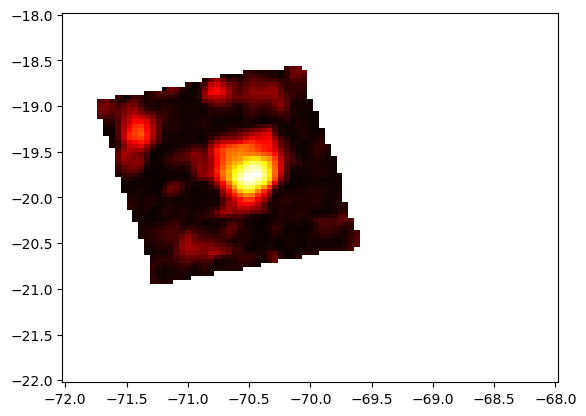

In [85]:
# plot contour of illapel with matplotlib
fig,ax=plt.subplots()
cs=ax.pcolormesh(X_iquique,np.flip(Y_iquique),Z_iquique,cmap='hot')

/tmp/ipykernel_14077/1772745912.py:49: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(pcolor, cax=axins2, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
/tmp/ipykernel_14077/1772745912.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


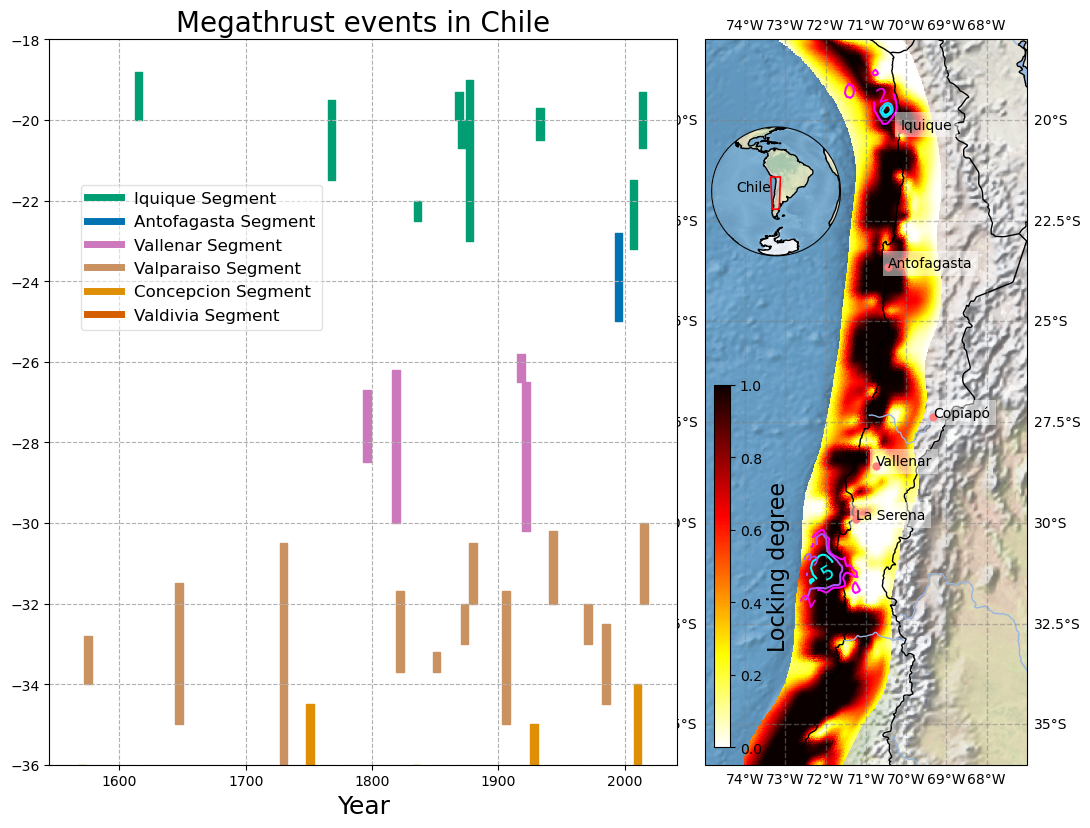

In [102]:
fig = plt.figure(figsize=(12, 8))
# Metois

#
# Proyección Albers Equal-Area Conic centrada en Chile
cities = {
    # 'Santiago': (-70.6483, -33.4569),
    # 'Valparaíso': (-71.6127, -33.0464),
    # 'Concepción': (-73.0500, -36.8276),
    'La Serena': (-71.2518, -29.9027),
    # 'Temuco': (-72.6007, -38.7350),
    'Antofagasta': (-70.4482, -23.6503),
    'Iquique': (-70.1333, -20.2167),
    # 'Valdivia': (-73.2474, -39.8042),
    'Copiapó': (-69.3333, -27.3667),
    # 'Talca': (-71.6572, -35.4268),
    'Vallenar': (-70.7583, -28.5750)
}

ax = fig.add_subplot(122, projection=ccrs.PlateCarree())
ylim=[-36, -18] 
ax.set_extent([-75, -67, -36, -18], crs=ccrs.PlateCarree())  # Extensión para Chile
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
axins = inset_axes(ax, width="40%", height="40%", loc="upper left", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(projection=cartopy.crs.Orthographic(central_longitude=-70, central_latitude=-30)))
axins.add_feature(cartopy.feature.COASTLINE)
axins.stock_img()
# add coupling
cs=ax.contour(X_illapel,Y_illapel,Z_illapel,levels=[2,3,5],cmap='cool_r',transform=ccrs.PlateCarree())
ax.clabel(cs, inline=True, fontsize=14)
cs=ax.contour(X_iquique,Y_iquique,Z_iquique,levels=[2,5,6],cmap='cool_r',transform=ccrs.PlateCarree())
ax.clabel(cs, inline=True, fontsize=14)
pcolor=ax.pcolor(X,Y,Z,cmap='hot_r',transform=ccrs.PlateCarree(),alpha=1)
axins2 = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50% of parent_bbox height
    loc="lower left",
    bbox_to_anchor=(0.02, 0.02, 1, 1),  # Ajuste la posición en el lado inferior izquierdo
    bbox_transform=ax.transAxes,
    borderpad=0.2,
)
cbar = fig.colorbar(pcolor, cax=axins2, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_label('Locking degree', rotation=90, fontsize=16)

# Dibujar un rectángulo alrededor de Chile en el inset usando plot
rect_lons = [-75, -66, -66, -75, -75]  # Longitudes para el rectángulo
rect_lats = [-46, -46, -17, -17, -46]  # Latitudes para el rectángulo
axins.plot(rect_lons, rect_lats, color='red', linestyle='-', linewidth=1.2,transform=ccrs.PlateCarree())
text='Chile'
axins.text(-75, -30, text, fontsize=10, ha='right', transform=ccrs.PlateCarree())


ax.background_img(name='NaturalEarthRelief', resolution='high')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.ylabels_left = False
gl.xlabels_top = False
ax.set_ylim(*ylim)
# Añadir las ciudades y sus nombres
for city, (lon, lat) in cities.items():
    ax.plot(lon, lat, 'ro', markersize=5, transform=ccrs.PlateCarree())  # Marca la ciudad
    t=ax.text(lon, lat, city, fontsize=10, ha='left', transform=ccrs.PlateCarree())  # Añade la etiqueta
    t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white',linewidth=0))

##
paleoseismicity = paleoseismicity[paleoseismicity['Subduction zone'] == 'South America']
filtered_paleoseismicity = paleoseismicity[paleoseismicity['Start'] <= -18.8]
color_palette = sns.color_palette("colorblind",10)
event_width_buffer = 3 # 3 years on either side of the event year for plotting rectangle
ax2 = fig.add_subplot(121)
legend_segments = {}
segment_colors = {}
for segment, segment_data in filtered_paleoseismicity.groupby('Segment'):
    # Extract info from dataframe for this subduction zone segment
    segment_colors[segment] = color_palette[len(segment_colors) % len(color_palette)]
    years = segment_data['Year']
    start = segment_data['Start']
    end = segment_data['End']
    type_lat_lon = segment_data['Type_lat_lon'].iloc[0]  # Assuming all values for this segment are the same
    color = segment_colors[segment]
    legend_segments[segment] = color

    for year, north_lat, south_lat in zip(years, start, end):
        ax2.fill_betweenx([south_lat, north_lat], year - event_width_buffer, year + event_width_buffer, label=segment, color=color)
legend_handles = [plt.Line2D([0], [0], linewidth = 5, color=color, label=segment) for segment, color in legend_segments.items()]
legend_handles2=[legend_handles[2],legend_handles[0],legend_handles[4],legend_handles[5],legend_handles[1],legend_handles[3]]

ax2.legend(handles=legend_handles2,loc=(0.05,0.6),framealpha=0.57,fontsize=12) # move legend outside of plot
ax2.set_ylim(ylim)
gl2 = ax2.grid(linestyle='--')
fig.tight_layout()
fig.subplots_adjust(wspace=-0.2)
ax2.set_xlabel('Year',fontsize=18)
plt.title('Megathrust events in Chile',fontsize=20)
fig.savefig('Iquique-ILLAPEL.png',dpi=300)


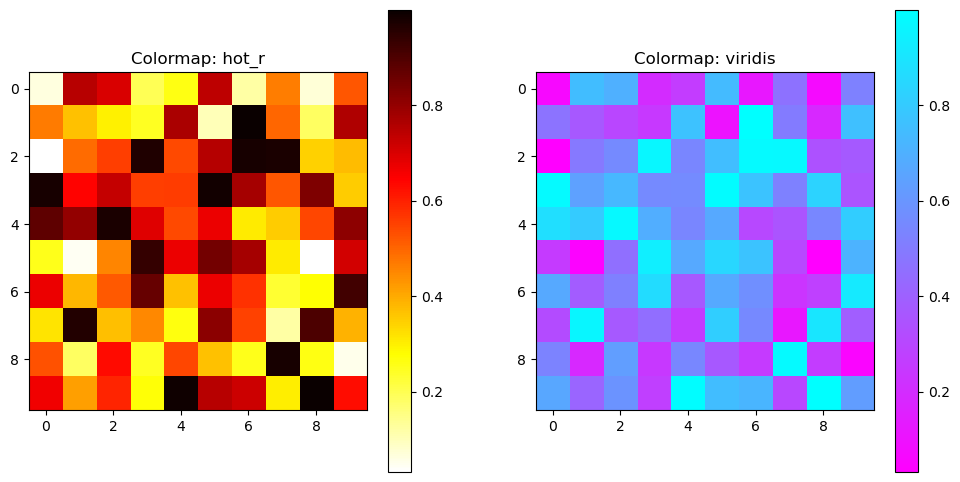

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una matriz de ejemplo
data = np.random.rand(10, 10)

# Crear una figura con dos subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Visualizar datos con la paleta hot_r
cax1 = ax[0].imshow(data, cmap='hot_r')
fig.colorbar(cax1, ax=ax[0])
ax[0].set_title('Colormap: hot_r')

# Visualizar datos con una paleta de colores que contraste (viridis)
cax2 = ax[1].imshow(data, cmap='cool_r')
fig.colorbar(cax2, ax=ax[1])
ax[1].set_title('Colormap: viridis')

plt.show()
